In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import scipy.stats as stats
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
customers_df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/customers_final.csv')
engagements_df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/engagements_final.csv')
marketing_df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/marketing_final.csv')
transactions_df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/transactions_final.csv')

In [3]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         10000 non-null  int64  
 1   join_date           10000 non-null  object 
 2   last_purchase_date  10000 non-null  object 
 3   age                 8991 non-null   float64
 4   gender              9467 non-null   object 
 5   location            10000 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 468.9+ KB


In [4]:
customers_df['join_date'] = pd.to_datetime(customers_df['join_date'])
customers_df['last_purchase_date'] = pd.to_datetime(customers_df['last_purchase_date'])

In [5]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129545 entries, 0 to 129544
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   transaction_id      129545 non-null  int64  
 1   customer_id         129545 non-null  int64  
 2   transaction_date    129545 non-null  object 
 3   transaction_amount  129545 non-null  float64
 4   product_category    129545 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 4.9+ MB


In [6]:
#Convert trasaction_date to datetime, product_category to category
transactions_df['transaction_date'] = pd.to_datetime(transactions_df['transaction_date'])
transactions_df['product_category'] = transactions_df['product_category'].astype('category')

In [7]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25200 entries, 0 to 25199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   campaign_id     25200 non-null  int64 
 1   customer_id     25200 non-null  int64 
 2   response        25200 non-null  object
 3   promotion_type  25200 non-null  object
 4   campaign_date   25200 non-null  object
dtypes: int64(2), object(3)
memory usage: 984.5+ KB


In [8]:
#Convert campaign_date data type to date in marketing_df
marketing_df['campaign_date'] = pd.to_datetime(marketing_df['campaign_date'])

In [9]:
engagements_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   customer_id              10000 non-null  int64
 1   number_of_site_visits    10000 non-null  int64
 2   number_of_emails_opened  10000 non-null  int64
 3   number_of_clicks         10000 non-null  int64
dtypes: int64(4)
memory usage: 312.6 KB


In [10]:
transactions_df.head()

,transaction_id,customer_id,transaction_date,transaction_amount,product_category
0,1,1,2024-02-03,165.56,Clothing
1,2,1,2024-03-02,699.01,Home Goods
2,3,1,2024-03-12,146.86,Home Goods
3,4,1,2024-01-20,927.46,Electronics
4,5,1,2024-02-25,1395.87,Electronics


In [11]:
customers_df.head()

,customer_id,join_date,last_purchase_date,age,gender,location
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury
1,2,2021-09-08,2023-10-25,NaN,Male,Hillville
2,3,2021-06-01,2022-11-27,NaN,NaN,North Latoyatown
3,4,2022-01-01,2022-09-01,29.0,Male,Grossstad
4,5,2022-01-24,2023-06-02,NaN,Male,East Matthewfort


In [12]:
marketing_df.head()

,campaign_id,customer_id,response,promotion_type,campaign_date
0,1,1,No,Buy One Get One,2024-02-29
1,2,1,No,Discount,2024-01-24
2,3,1,No,Free Shipping,2024-03-05
3,4,1,Yes,Buy One Get One,2024-01-10
4,5,2,Yes,Free Shipping,2022-07-08


In [13]:
engagements_df.head()

,customer_id,number_of_site_visits,number_of_emails_opened,number_of_clicks
0,1,10,15,1
1,2,285,49,51
2,3,192,73,25
3,4,110,30,17
4,5,161,2,7


In [14]:
transactions_df.isnull().sum()/100 

transaction_id        0.0
customer_id           0.0
transaction_date      0.0
transaction_amount    0.0
product_category      0.0
dtype: float64

In [15]:
marketing_df.isnull().sum()/100 

campaign_id       0.0
customer_id       0.0
response          0.0
promotion_type    0.0
campaign_date     0.0
dtype: float64

In [16]:
engagements_df.isnull().sum()/100 

customer_id                0.0
number_of_site_visits      0.0
number_of_emails_opened    0.0
number_of_clicks           0.0
dtype: float64

In [17]:
customers_df.isnull().sum()/100 

customer_id            0.00
join_date              0.00
last_purchase_date     0.00
age                   10.09
gender                 5.33
location               0.00
dtype: float64

In [18]:
customers_df['age'].fillna(customers_df['age'].median(), inplace=True)
customers_df['gender'].fillna('Unknown', inplace=True)

/var/folders/95/mkx4bvf95x35657hmtzpc5fr0000gn/T/ipykernel_40951/985600695.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers_df['age'].fillna(customers_df['age'].median(), inplace=True)
/var/folders/95/mkx4bvf95x35657hmtzpc5fr0000gn/T/ipykernel_40951/985600695.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

In [19]:
customers_df.isnull().sum()/100 

customer_id           0.0
join_date             0.0
last_purchase_date    0.0
age                   0.0
gender                0.0
location              0.0
dtype: float64

In [20]:
transactions_df.head()

,transaction_id,customer_id,transaction_date,transaction_amount,product_category
0,1,1,2024-02-03,165.56,Clothing
1,2,1,2024-03-02,699.01,Home Goods
2,3,1,2024-03-12,146.86,Home Goods
3,4,1,2024-01-20,927.46,Electronics
4,5,1,2024-02-25,1395.87,Electronics


<Axes: ylabel='transaction_amount'>

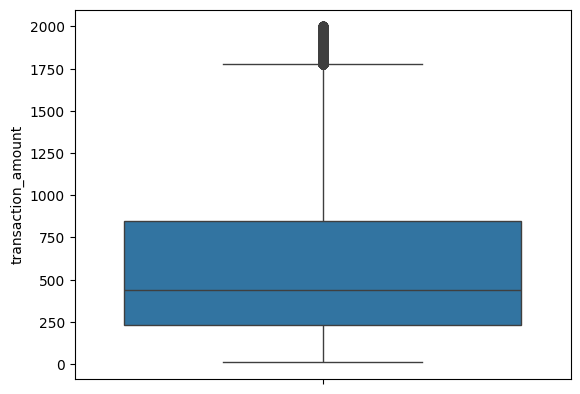

In [21]:
sns.boxplot(y='transaction_amount',data=transactions_df)

<Axes: xlabel='product_category', ylabel='transaction_amount'>

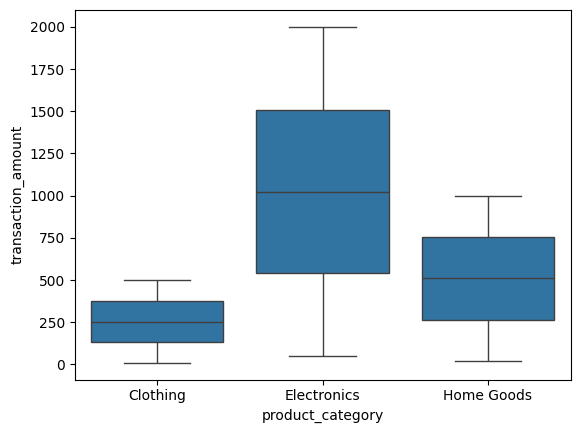

In [22]:

sns.boxplot(x='product_category', y='transaction_amount', data=transactions_df)

<Axes: xlabel='number_of_site_visits', ylabel='Count'>

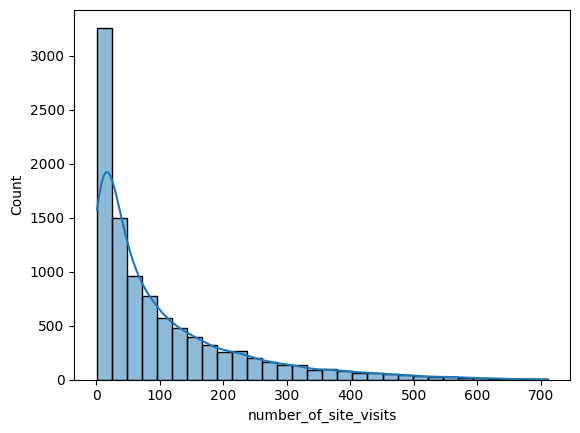

In [23]:
sns.histplot(engagements_df['number_of_site_visits'], bins=30, kde=True)

<Axes: xlabel='number_of_clicks', ylabel='Count'>

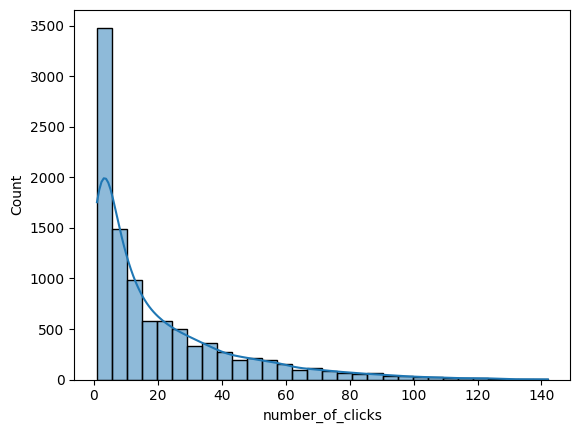

In [24]:
sns.histplot(engagements_df['number_of_clicks'], bins=30, kde=True)

<Axes: xlabel='number_of_emails_opened', ylabel='Count'>

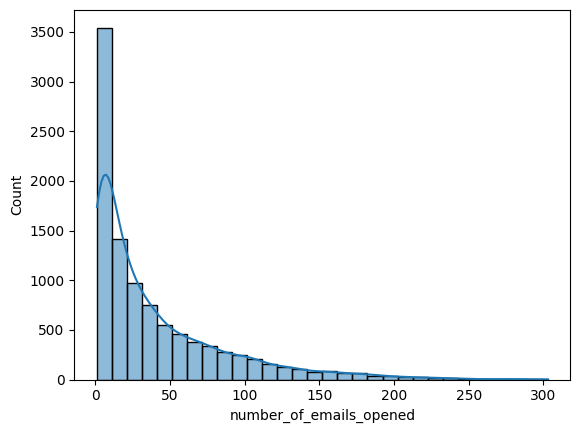

In [25]:
sns.histplot(engagements_df['number_of_emails_opened'], bins=30, kde=True)

In [26]:
#sns.countplot(y=customers_df['location'], order=customers_df['location'].value_counts().index)

Merging the datasets together

In [27]:
marketing_agg = marketing_df[marketing_df['response']=='Yes'].groupby('customer_id')['campaign_id'].count().to_frame()

In [28]:
transactions_agg = transactions_df.groupby('customer_id').aggregate({'transaction_id':'count','transaction_amount':'sum'})

In [29]:
#RFM model to assess recency, and frequency of each customer
# Calculate recency
latest_date = transactions_df['transaction_date'].max()
recency = transactions_df.groupby('customer_id')['transaction_date'].max().reset_index()
recency['recency'] = (latest_date - recency['transaction_date']).dt.days
recency.drop(columns='transaction_date', inplace=True)

# Calculate frequency
frequency = transactions_df.groupby('customer_id')['transaction_id'].count().reset_index()
frequency.columns = ['customer_id', 'frequency']

# Monetary: Total amount spent by the customer
#monetary_df = transactions_df.groupby('customer_id')['transaction_amount'].sum().reset_index(name='monetary')
#customers_df = customers_df.merge(monetary_df, on='customer_id', how='left').fillna(0)

# Merge RFM metrics
rfm_df = pd.merge(recency, frequency, on='customer_id')

In [30]:
#step 3: set customers and engagement index as customer_id
customers_df.set_index('customer_id', inplace=True)
engagements_df.set_index('customer_id', inplace=True)
rfm_df.set_index('customer_id', inplace=True)

In [31]:
df_merged = customers_df.join(engagements_df).join(transactions_agg).join(marketing_agg).join(rfm_df)

In [32]:
df_merged

,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_amount,campaign_id,recency,frequency
customer_id,,,,,,,,,,,,,
1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,6,3509.48,1.0,80,6
2,2021-09-08,2023-10-25,44.0,Male,Hillville,285,49,51,9,6081.32,2.0,460,9
3,2021-06-01,2022-11-27,44.0,Unknown,North Latoyatown,192,73,25,6,1454.87,1.0,560,6
4,2022-01-01,2022-09-01,29.0,Male,Grossstad,110,30,17,20,7874.68,1.0,639,20
5,2022-01-24,2023-06-02,44.0,Male,East Matthewfort,161,2,7,24,15524.55,NaN,365,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2022-12-16,2023-08-13,42.0,Female,Johnstonborough,119,47,16,10,5498.20,NaN,355,10
9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth,3,33,14,12,5848.30,1.0,540,12
9998,2023-09-17,2024-01-30,39.0,Male,New John,53,17,5,3,3503.13,1.0,151,3


In [33]:
# Lifetime Value (LTV): Time since the customer joined
df_merged['tenure'] = (df_merged['last_purchase_date'] - df_merged['join_date']).dt.days

In [34]:
df_merged

,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_amount,campaign_id,recency,frequency,tenure
customer_id,,,,,,,,,,,,,,
1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,6,3509.48,1.0,80,6,118
2,2021-09-08,2023-10-25,44.0,Male,Hillville,285,49,51,9,6081.32,2.0,460,9,777
3,2021-06-01,2022-11-27,44.0,Unknown,North Latoyatown,192,73,25,6,1454.87,1.0,560,6,544
4,2022-01-01,2022-09-01,29.0,Male,Grossstad,110,30,17,20,7874.68,1.0,639,20,243
5,2022-01-24,2023-06-02,44.0,Male,East Matthewfort,161,2,7,24,15524.55,NaN,365,24,494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2022-12-16,2023-08-13,42.0,Female,Johnstonborough,119,47,16,10,5498.20,NaN,355,10,240
9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth,3,33,14,12,5848.30,1.0,540,12,200
9998,2023-09-17,2024-01-30,39.0,Male,New John,53,17,5,3,3503.13,1.0,151,3,135


<Axes: xlabel='age', ylabel='Count'>

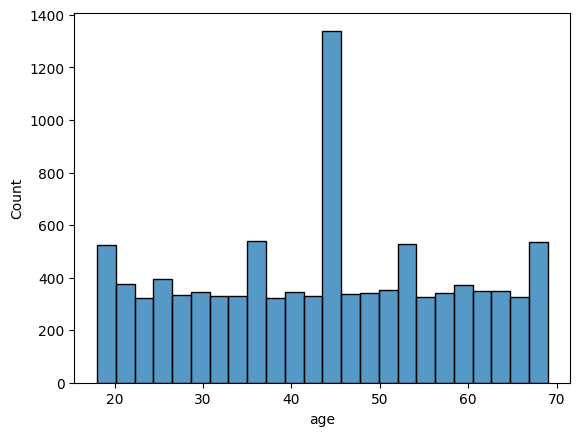

In [35]:
sns.histplot(df_merged['age'])

In [36]:
#Creating customer buckets to help indentify the customer value of each bucket
def generation(age):
    if 12 <= age <= 27:
        return 'Gen_Z'
    elif 28 <= age <= 43:
       return 'Millennials'
    elif 44 <= age <= 59:
        return 'Gen_X'
    elif 60 <= age <= 78:
        return 'Baby_Boomers'
    elif 79 <= age <= 96:
        return 'Silent_Generation'
    else:
        return 'Unknown'

In [37]:
df_merged['generation'] = df_merged['age'].apply(generation)

In [38]:
df_merged

,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_amount,campaign_id,recency,frequency,tenure,generation
customer_id,,,,,,,,,,,,,,,
1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,6,3509.48,1.0,80,6,118,Gen_X
2,2021-09-08,2023-10-25,44.0,Male,Hillville,285,49,51,9,6081.32,2.0,460,9,777,Gen_X
3,2021-06-01,2022-11-27,44.0,Unknown,North Latoyatown,192,73,25,6,1454.87,1.0,560,6,544,Gen_X
4,2022-01-01,2022-09-01,29.0,Male,Grossstad,110,30,17,20,7874.68,1.0,639,20,243,Millennials
5,2022-01-24,2023-06-02,44.0,Male,East Matthewfort,161,2,7,24,15524.55,NaN,365,24,494,Gen_X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2022-12-16,2023-08-13,42.0,Female,Johnstonborough,119,47,16,10,5498.20,NaN,355,10,240,Millennials
9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth,3,33,14,12,5848.30,1.0,540,12,200,Gen_Z
9998,2023-09-17,2024-01-30,39.0,Male,New John,53,17,5,3,3503.13,1.0,151,3,135,Millennials


<Axes: xlabel='generation', ylabel='transaction_amount'>

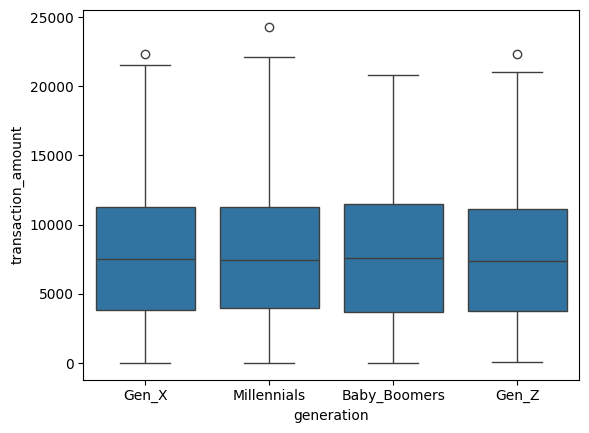

In [39]:
sns.boxplot(x='generation', y='transaction_amount', data=df_merged)

<Axes: ylabel='transaction_amount'>

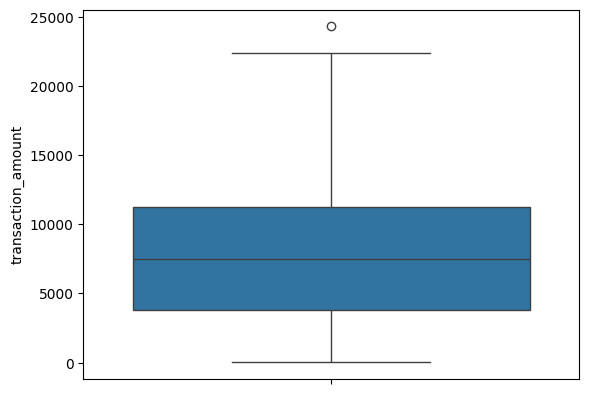

In [40]:
sns.boxplot(y='transaction_amount', data=df_merged)

<Axes: xlabel='generation', ylabel='frequency'>

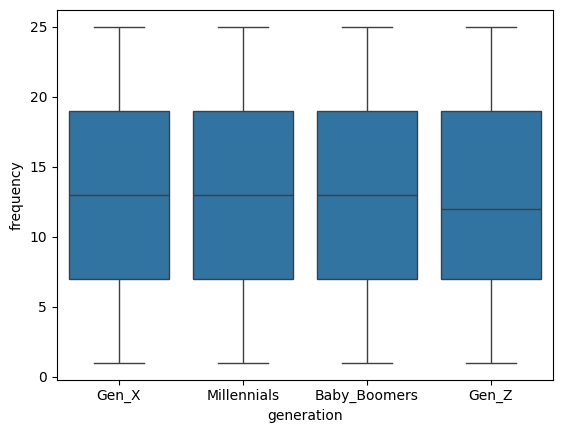

In [41]:
sns.boxplot(x='generation', y='frequency', data=df_merged)

Text(0.5, 1.0, 'Recency by Generation')

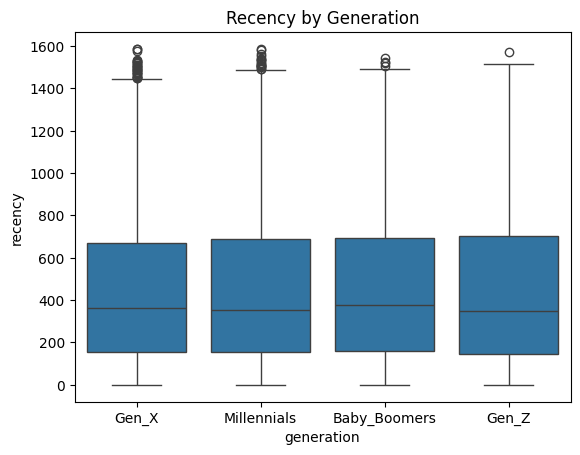

In [42]:
sns.boxplot(x='generation', y='recency', data=df_merged)
plt.title('Recency by Generation')

<Axes: xlabel='generation', ylabel='frequency'>

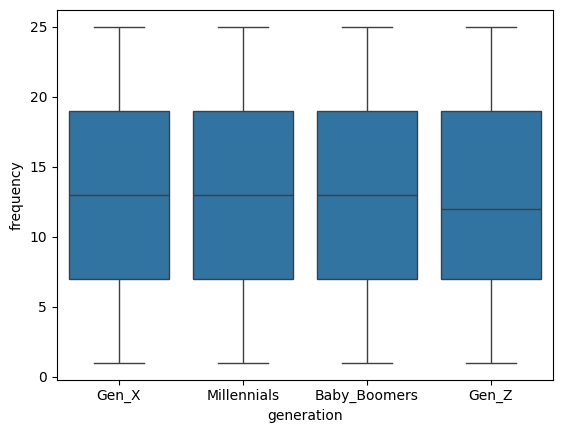

In [43]:
sns.boxplot(x='generation', y='frequency', data=df_merged)

<Axes: xlabel='generation', ylabel='tenure'>

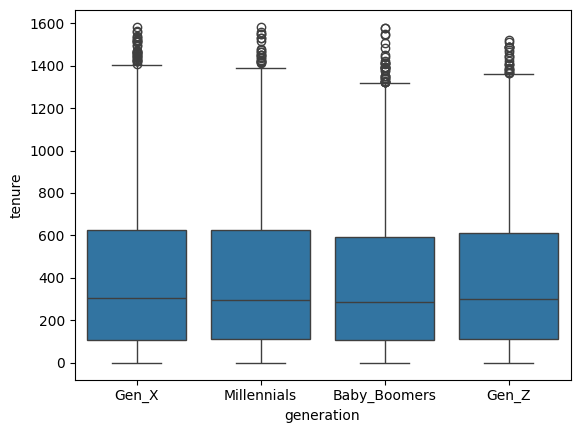

In [44]:
sns.boxplot(x='generation', y='tenure', data=df_merged)

In [45]:
# Calculate RFM Scores
df_merged['recency_score'] = pd.qcut(df_merged['recency'], 5, labels=False, duplicates='drop')
df_merged['frequency_score'] = pd.qcut(df_merged['frequency'].rank(method='first'), 5, labels=False)
df_merged['monetary_score'] = pd.qcut(df_merged['transaction_amount'], 5, labels=False, duplicates='drop')

# Combine RFM Scores into a single score
df_merged['rfm_score'] = df_merged['recency_score'] + df_merged['frequency_score'] + df_merged['monetary_score']


In [46]:
df_merged

,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_id,transaction_amount,campaign_id,recency,frequency,tenure,generation,recency_score,frequency_score,monetary_score,rfm_score
customer_id,,,,,,,,,,,,,,,,,,,
1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,6,3509.48,1.0,80,6,118,Gen_X,0,0,1,1
2,2021-09-08,2023-10-25,44.0,Male,Hillville,285,49,51,9,6081.32,2.0,460,9,777,Gen_X,2,1,2,5
3,2021-06-01,2022-11-27,44.0,Unknown,North Latoyatown,192,73,25,6,1454.87,1.0,560,6,544,Gen_X,3,0,0,3
4,2022-01-01,2022-09-01,29.0,Male,Grossstad,110,30,17,20,7874.68,1.0,639,20,243,Millennials,3,3,2,8
5,2022-01-24,2023-06-02,44.0,Male,East Matthewfort,161,2,7,24,15524.55,NaN,365,24,494,Gen_X,2,4,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2022-12-16,2023-08-13,42.0,Female,Johnstonborough,119,47,16,10,5498.20,NaN,355,10,240,Millennials,2,2,1,5
9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth,3,33,14,12,5848.30,1.0,540,12,200,Gen_Z,3,2,1,6
9998,2023-09-17,2024-01-30,39.0,Male,New John,53,17,5,3,3503.13,1.0,151,3,135,Millennials,1,0,1,2


In [59]:
# Prepare the data for OLS regression
import statsmodels.api as sm
# Select features and target variable
features = ['frequency', 'recency', 'transaction_amount', 'age','gender']
target = 'tenure'

# Split the data into training and test sets
X = df_merged[features]
y = df_merged[target]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the OLS model
ols_model = sm.OLS(y, X).fit()

# Summary of the OLS regression
ols_summary = ols_model.summary()

print(ols_summary)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [60]:
# Building a linear regression model based on the the recency, frequency, transaction_amount, lifetime value(ltv), age, gender and rfm-score
features = ['recency', 'frequency', 'transaction_amount', 'age', 'gender', 'rfm_score']
target = ['tenure']
X = pd.get_dummies(df_merged[features], drop_first=True)
y = df_merged['transaction_amount']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R2 Score: {r2}')

MSE: 1.4182977426716028e-23
MAE: 2.905983009782176e-12
R2 Score: 1.0


In [49]:
from sklearn.model_selection import cross_val_score

# Performing 5-fold cross-validation
cv_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mae = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')

print(f'Cross-validated MSE: {-cv_mse.mean()}')
print(f'Cross-validated MAE: {-cv_mae.mean()}')
print(f'Cross-validated R² Score: {cv_r2.mean()}')

Cross-validated MSE: 1.1459401602763905e-23
Cross-validated MAE: 2.467353610313694e-12
Cross-validated R² Score: 1.0


In [50]:
#sns.boxplot(x='generation', y='customer_lifetime', data=df_merged)

In [51]:
#df_merged['location'].unique()

In [52]:
#fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(8,8), sharey=False, sharex=True)
#sns.scatterplot(x='temp', y='casual', data=df_merged, ax=ax1)
#sns.scatterplot(x='temp', y='registered', data=df_merged, ax=ax2)
#sns.scatterplot(x='temp', y='count', data=df_merged, ax=ax3)
#sns.scatterplot(x='temp', y='casual', data=df_merged, ax=ax4)
#sns.scatterplot(x='temp', y='registered', data=df_merged, ax=ax5)
#sns.scatterplot(x='temp', y='count', data=df_merged, ax=ax6)

In [53]:
#generation_dummies = pd.get_dummies(customers_df)

In [54]:
# Define features and target variable
#X = df_merged.drop(columns=['customer_id', 'transaction_amount'])
#y = df_merged['transaction_amount']

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
#lr_model = LinearRegression()

# Train the model
#lr_model.fit(X_train, y_train)

# Make predictions
#y_pred = lr_model.predict(X_test)

# Evaluate the model
#lr_mae = mean_absolute_error(y_test, y_pred)
#lr_rmse = mean_squared_error(y_test, y_pred, squared=False)

#print(f"Linear Regression MAE: {lr_mae}, RMSE: {lr_rmse}")

In [55]:
#print(df_merged.columns)